In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read raw csv file, store in a variable
raw = pd.read_csv("/content/drive/MyDrive/Data1501/Datasets/bigfoot-sightings.csv")
# load data to DataFrame
df = pd.DataFrame(raw)
# test top 10 rows
df.iloc[:10]

In [ ]:
# CLEAN DATA:
# drop irrelevant 'number' col
df2 = df.drop('number', axis=1)

# slice relevant 'timestamp' values to new cols (truncating flawed vals)
df2['mm'] = df2['timestamp'].str.slice(5,7)    # slice months (x,y]
df2['dd'] = df2['timestamp'].str.slice(8,10)   # slice days   (x,y]
df2['yyyy'] = df2['timestamp'].str.slice(0,4)  # slice years  (x,y]

# drop unnecessary 'timestamp' col
df3 = df2.drop('timestamp', axis=1)

# drop unnecessary 'title' col
df4 = df3.drop('title', axis=1)

df4.iloc[:10]  # top 10 rows

In [ ]:
# SUMMARIZE DATA:
# store each col in a variable
dd = df4.dd
mm = df4.mm
year = df4.yyyy
lat = df4.latitude
lon = df4.longitude
grade = df4.classification
# get number sightings (num rows)
num_sights = len(df.index)

In [ ]:
# MANIPULATE & SUMMARIZE DATA
# DAYS: create sorted arr and set of days data points
d_arr = []
for x in dd:
  d_arr.append(x)
d_arr.sort()
# convert arr to set
d_set = set(d_arr)
d_set_arr = list(d_set)

# MONTHS: create sorted arr of months data points
m_arr = []
for x in mm:
  m_arr.append(x)
m_arr.sort()
# convert arr to set
m_set = set(m_arr)
m_set_arr = list(m_set)

# YEARS: create sorted arr of year data points
y_arr = []
for x in year:
  y_arr.append(x)
y_arr.sort()
# normalize outlier values 1869 and 2053
y_arr[0] = y_arr[1]
y_arr[len(y_arr)-1] = y_arr[len(y_arr)-2]
# convert arr to set
y_set = set(y_arr)
y_set_arr = list(y_set)

In [ ]:
# convert classification grades to arr for pie plot
a, b, c = 0, 0, 0
grade_arr = []
for x in grade:
  grade_arr.append(x)
  if x == "Class A":
    a += 1
  if x == "Class B":
    b += 1
  if x == "Class C":
    c += 1
num_ea_grade = [a, b, c]
num_ea_grade  # check values

[1895, 1896, 19]

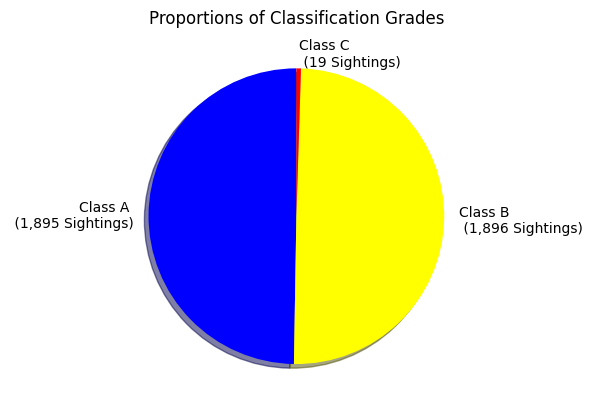

In [ ]:
# VISUALIZE DATA: pie plot of classification grades
wdg_labels = ["Class A \n (1,895 Sightings)",
              "Class B \n (1,896 Sightings)",
              "Class C \n (19 Sightings)"]               # wedge labels
wdg_colors = ["blue", "yellow", "red"]                   # wedge colors
# plot data points using labels, colors, and data arr
plt.pie(num_ea_grade, labels=wdg_labels, startangle=90,
        colors=wdg_colors, shadow=True)
plt.title("Proportions of Classification Grades")        # set title
plt.show()

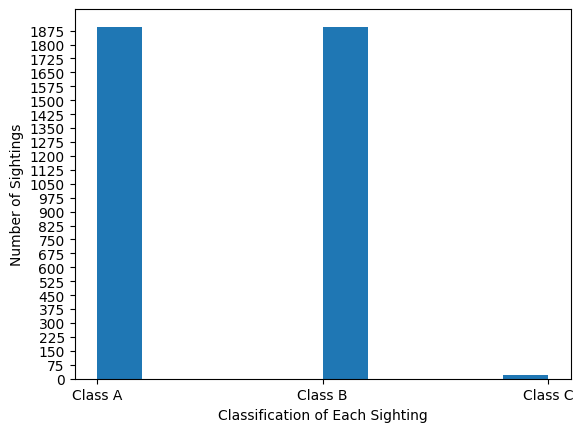

<Figure size 800x800 with 0 Axes>

In [ ]:
# histograph classification grades
plt.hist(grade)
plt.ylabel("Number of Sightings")
plt.xlabel("Classification of Each Sighting")
plt.yticks(range(0,1950,75))
plt.figure(figsize=(8,8))
plt.show()

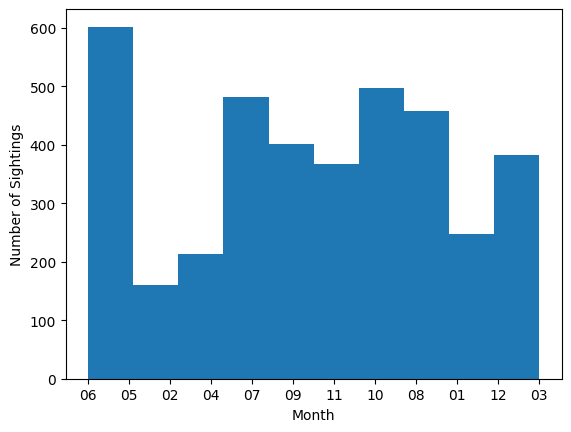

In [ ]:
# histograph: months with most sightings
plt.hist(mm)
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.show()

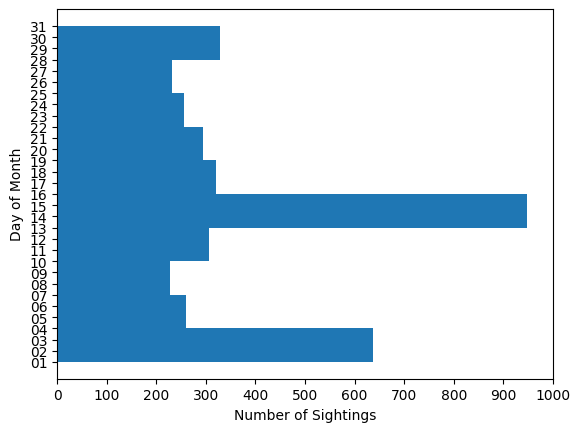

In [ ]:
# histograph: days with most sightings
plt.hist(d_arr,orientation='horizontal',rwidth=20)
plt.xticks(range(0, 1100, 100))
plt.xlabel("Number of Sightings")
plt.ylabel("Day of Month")
plt.show()